# Home task 8

1. Take any dataset suitable for regression analysis. You can use your own data or some publicly available.

2. Preprocess the data (if necessary).

3. Build reasonable regression models using statsmodels package.

4. Use diagnostics functionality of `statsmodels` package to assess the quality of your models.

5. Present the results as summary tables for models and diagnostical plots/tables/values.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sma
import statsmodels.stats.stattools as sms
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
wine = pd.read_csv("/Users/macbook/Desktop/winequality-red.csv")
wine.head(5)
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
wine.shape # 1599 wines and 12 variables

(1599, 12)

In [5]:
!pip install scikit-na
import scikit_na as na

In [6]:
na.summary(wine).T # no zero values

,NA count,"NA, % (per column)","NA, % (of all NAs)",NA unique (per column),"NA unique, % (per column)",Rows left after dropna(),"Rows left after dropna(), %"
fixed_acidity,0.0,0.0,0.0,0.0,0.0,1599.0,100.0
volatile_acidity,0.0,0.0,0.0,0.0,0.0,1599.0,100.0
citric_acid,0.0,0.0,0.0,0.0,0.0,1599.0,100.0
residual_sugar,0.0,0.0,0.0,0.0,0.0,1599.0,100.0
chlorides,0.0,0.0,0.0,0.0,0.0,1599.0,100.0
free_sulfur_dioxide,0.0,0.0,0.0,0.0,0.0,1599.0,100.0
total_sulfur_dioxide,0.0,0.0,0.0,0.0,0.0,1599.0,100.0
density,0.0,0.0,0.0,0.0,0.0,1599.0,100.0
pH,0.0,0.0,0.0,0.0,0.0,1599.0,100.0
sulphates,0.0,0.0,0.0,0.0,0.0,1599.0,100.0


In [7]:
model = smf.ols(
    'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + density + pH + sulphates + alcohol',  
    data=wine).fit()

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     86.44
Date:                Fri, 20 May 2022   Prob (F-statistic):          3.63e-142
Time:                        19:29:08   Log-Likelihood:                -1579.2
No. Observations:                1599   AIC:                             3180.
Df Residuals:                    1588   BIC:                             3240.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              28.7507     21.267      1.352      0.177     -12.964      70.465
fixed_acidity           0.0519      0.025      2.045      0.041       0.002       0.102
volatile_acidity       -1.1997      0.119    -10.082      0.000      -1.433      -0.966
citric_acid            -0.3573      0.143     -2.502      0.012      -0.637      -0.077
residual_sugar          0.0139      0.015      0.921      0.357      -0.016       0.043
chlorides              -1.6109      0.418     -3.857      0.000      -2.430      -0.792
free_sulfur_dioxide    -0.0021      0.002     -1.276      0.202      -0.005       0.001
density               -25.5162     21.695     -1.176      0.240     -68.070      17.038
pH                     -0.2472      0.189     -1.307      0.191      -0.618       0.124
sulphates               0.8994      0.115      7.824      0.000       0.674       1.125
alcohol                 0.2861      0.027     10.776      0.000       0.234       0.338
==============================================================================
Omnibus:                       24.508   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.999
Skew:                          -0.144   Prob(JB):                     9.24e-09
Kurtosis:                       3.687   Cond. No.                     4.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
model1 = smf.ols(
    'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + total_sulfur_dioxide + density + pH + sulphates + alcohol',  
    data=wine).fit()

In [10]:
model1.summary() # this model is better than previous model with free sulfar dioxide

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     88.91
Date:                Fri, 20 May 2022   Prob (F-statistic):          1.36e-145
Time:                        19:29:16   Log-Likelihood:                -1571.2
No. Observations:                1599   AIC:                             3164.
Df Residuals:                    1588   BIC:                             3223.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               25.4931     21.142      1.206      0.228     -15.976      66.962
fixed_acidity            0.0307      0.026      1.190      0.234      -0.020       0.081
volatile_acidity        -1.1238      0.120     -9.400      0.000      -1.358      -0.889
citric_acid             -0.2306      0.145     -1.586      0.113      -0.516       0.055
residual_sugar           0.0201      0.015      1.352      0.176      -0.009       0.049
chlorides               -1.8249      0.419     -4.356      0.000      -2.647      -1.003
total_sulfur_dioxide    -0.0023      0.001     -4.201      0.000      -0.003      -0.001
density                -21.5936     21.575     -1.001      0.317     -63.911      20.724
pH                      -0.3607      0.190     -1.899      0.058      -0.733       0.012
sulphates                0.9287      0.114      8.127      0.000       0.705       1.153
alcohol                  0.2748      0.026     10.370      0.000       0.223       0.327
==============================================================================
Omnibus:                       28.557   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.420
Skew:                          -0.179   Prob(JB):                     6.14e-10
Kurtosis:                       3.713   Cond. No.                     1.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
df_model = pd.DataFrame({'coef': model1.params, 'p': model1.pvalues})

In [12]:
df_model.query('p < 0.05').sort_values('coef').style.background_gradient(cmap = 'RdBu_r', subset = ['coef'])

,coef,p
chlorides,-1.824936,0.000014
volatile_acidity,-1.123809,0.000000
total_sulfur_dioxide,-0.002294,0.000028
alcohol,0.274807,0.000000
sulphates,0.928727,0.000000


### Diagnostics

In [13]:
df_short = wine.loc[:, ['quality', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 
                        'residual_sugar', 'chlorides', 'total_sulfur_dioxide', 'density', 'pH', 
                        'sulphates','alcohol']]

### Residuals normality

In [14]:
# Jarque-Bera test
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(model1.resid)
dict(zip(name, test))

{'Jarque-Bera': 42.42046031538924,
 'Chi^2 two-tail prob.': 6.144889570597315e-10,
 'Skew': -0.1790171797828979,
 'Kurtosis': 3.7131032482252735}

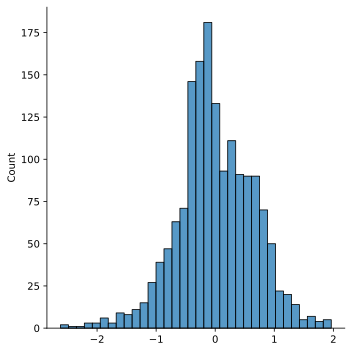

In [15]:
sns.displot(model1.resid) 

### Multicollinearity

In [16]:
np.linalg.cond(model1.model.exog)

108133.15048385113

In [17]:
corr = df_short.corr(method='kendall') 
corr.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1).set_precision(2)

/var/folders/ws/vf38bhcj6v35f_f7xgby572r0000gn/T/ipykernel_92208/3792137175.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1).set_precision(2)


,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,1.00,0.09,-0.30,0.17,0.03,-0.15,-0.16,-0.14,-0.03,0.30,0.38
fixed_acidity,0.09,1.00,-0.19,0.48,0.16,0.18,-0.06,0.46,-0.53,0.14,-0.05
volatile_acidity,-0.30,-0.19,1.00,-0.43,0.02,0.11,0.06,0.02,0.16,-0.23,-0.15
citric_acid,0.17,0.48,-0.43,1.00,0.12,0.08,0.01,0.25,-0.39,0.23,0.06
residual_sugar,0.03,0.16,0.02,0.12,1.00,0.15,0.10,0.30,-0.06,0.03,0.08
chlorides,-0.15,0.18,0.11,0.08,0.15,1.00,0.09,0.29,-0.16,0.01,-0.20
total_sulfur_dioxide,-0.16,-0.06,0.06,0.01,0.10,0.09,1.00,0.09,-0.01,-0.00,-0.18
density,-0.14,0.46,0.02,0.25,0.30,0.29,0.09,1.00,-0.22,0.11,-0.33
pH,-0.03,-0.53,0.16,-0.39,-0.06,-0.16,-0.01,-0.22,1.00,-0.05,0.13
sulphates,0.30,0.14,-0.23,0.23,0.03,0.01,-0.00,0.11,-0.05,1.00,0.14


In [18]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar \
+ chlorides + total_sulfur_dioxide + density + pH + sulphates + alcohol', data=df_short, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
round(vif,2)

# vif у fixed_acidity, density > 4, что говорит о присутствии мультиколлинеарности

,VIF,variable
0,1698791.72,Intercept
1,7.67,fixed_acidity
2,1.74,volatile_acidity
3,3.05,citric_acid
4,1.68,residual_sugar
5,1.48,chlorides
6,1.23,total_sulfur_dioxide
7,6.30,density
8,3.27,pH
9,1.43,sulphates


### Heterockedasticity

In [19]:
# Breush-Pagan test
name = ["Lagrande multiplier statistic", "p-value", "f-value", "f p-value"]
test = sma.het_breuschpagan(model1.resid, model1.model.exog)
test = [round(i, 3) for i in test]
dict(zip(name, test))
# присутствует гетероскедастичность

{'Lagrande multiplier statistic': 84.213,
 'p-value': 0.0,
 'f-value': 8.828,
 'f p-value': 0.0}

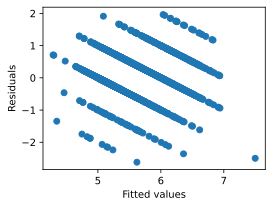

In [20]:
fig, ax = plt.subplots(figsize=(4,3))

ax.plot(model1.fittedvalues, model1.resid, 'o')
plt.ylabel("Residuals")
plt.xlabel("Fitted values"); 
# присутсвует гетероскедастичность

## Results

Please create a Jupyter Notebook file named as `lastname_hometask8.ipynb` (example: `terpilowski_hometask8.ipynb`) and place all the code in it.